In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'..\files\clean_classes_V3.csv')
df_test = pd.read_csv(r'..\files\nouvelle_data.csv')

variables_quali = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','age_opti','hours-per-week_opti','income']
variables_quali2 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','age_opti','hours-per-week_opti']

variables_quanti = ['capital-gain', 'capital-loss']

# Stats Desc Fichier OG

Graph Quali

Private                 33906
State-Local-gov          5117
Self-emp-not-inc         3862
No_income_or_unknown     2830
Self-emp-inc             1695
Federal-gov              1432
Name: workclass, dtype: int64


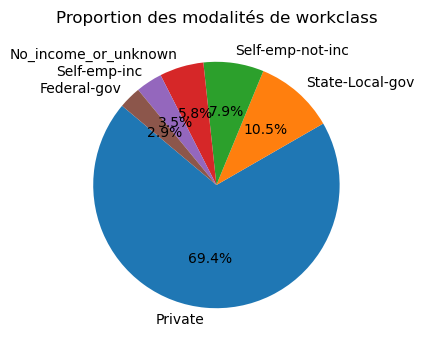

HS-grad          15784
Some-college     10878
Bachelors         8025
Low-education     6408
Assoc             3662
Masters           2657
Graduation        1428
Name: education, dtype: int64


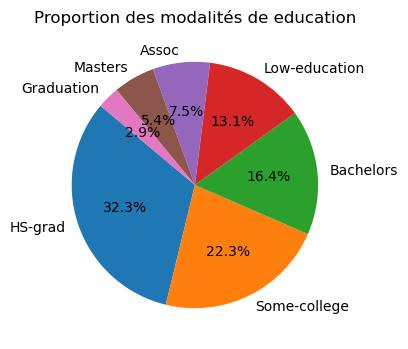

Married-civ-spouse    22379
Never-married         16117
Alone                 10346
Name: marital-status, dtype: int64


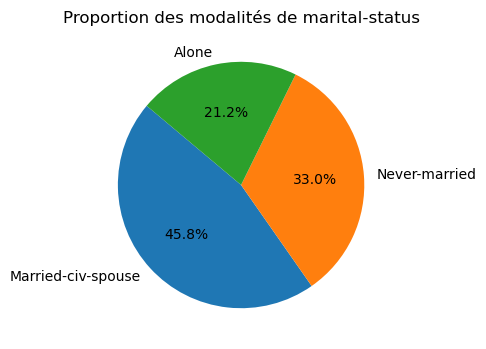

Occupation:VeryHigh-income    12258
Occupation:Low-income         10123
Occupation:Very-Low-income    10046
Occupation:Mid-income          8467
Occupation:High-income         7948
Name: occupation, dtype: int64


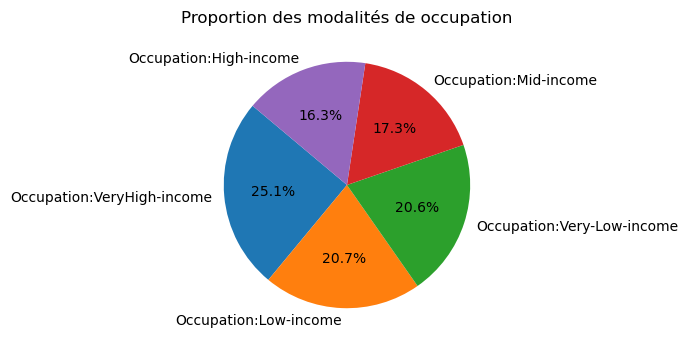

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


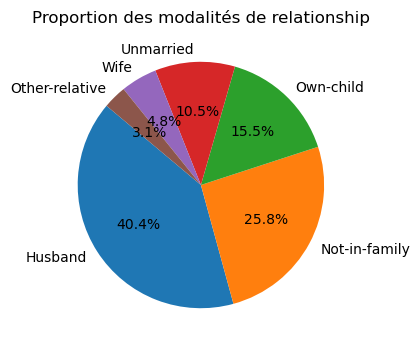

White         41762
Black          4685
Other_race     2395
Name: race, dtype: int64


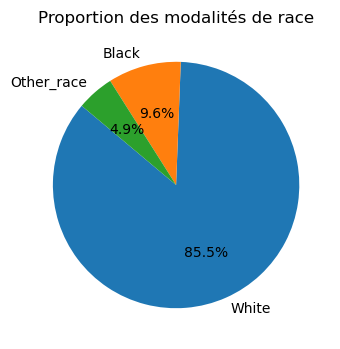

Male      32650
Female    16192
Name: gender, dtype: int64


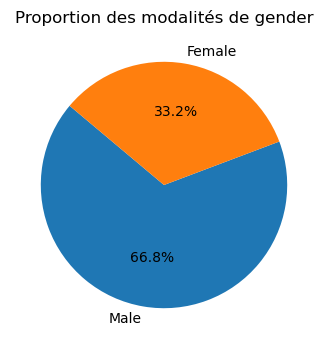

United-States    43832
Other_country     5010
Name: native-country, dtype: int64


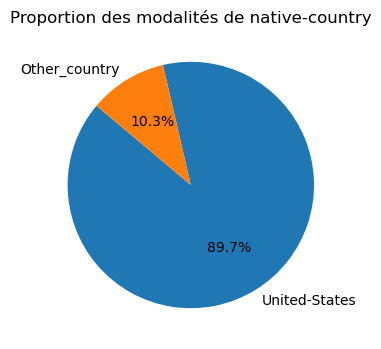

(41.0, 55.0]      12198
(28.0, 35.0]       8627
(16.999, 24.0]     7308
(35.0, 41.0]       7210
(55.0, 90.0]       5299
(24.0, 28.0]       4580
Name: age_opti, dtype: int64


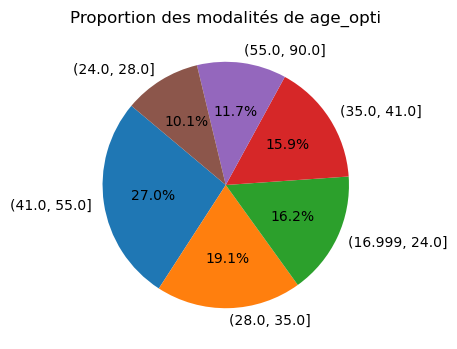

(39.0, 43.0]     21959
(43.0, 54.0]      8287
(0.999, 28.0]     5056
(28.0, 39.0]      5031
(54.0, 99.0]      4889
Name: hours-per-week_opti, dtype: int64


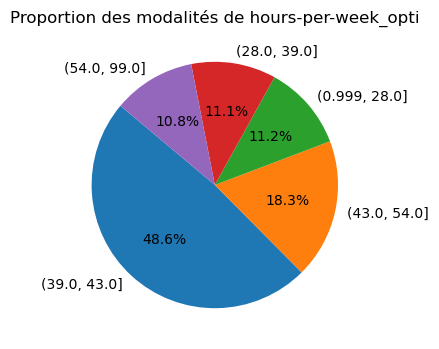

<=50K    37155
>50K     11687
Name: income, dtype: int64


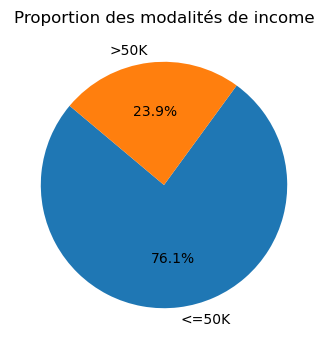

In [15]:
# Boucle qui itere le processus de création d'un piechart pour chaque variable qualitative
for col in variables_quali:
    prop_mod = df[col].value_counts()
    print(prop_mod)

    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    plt.show()

Graph Quanti

In [16]:
"""
for variable in variable_courbe_dens:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe
    plt.title(f'Courbe de densité de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densité')
    plt.show()
"""

"\nfor variable in variable_courbe_dens:\n    plt.figure(figsize=(8, 5))\n    sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe\n    plt.title(f'Courbe de densité de {variable}')\n    plt.xlabel(variable)\n    plt.ylabel('Densité')\n    plt.show()\n"

Boxplots Valeurs Aberrantes

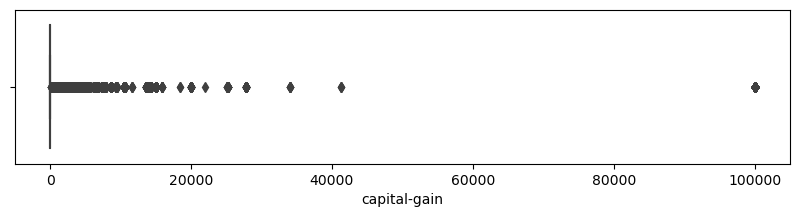

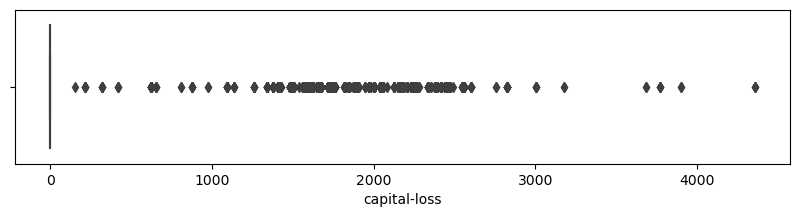

In [17]:
for variable in variables_quanti:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)
    plt.show()

STATS BI

In [ ]:
# Calcule les pourcentages pour chaque combination workclass et income

for variable in variables_quali2 :
    grouped = df_test.groupby([variable, 'income']).size().unstack()
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100
    print(percentages)

    # Tri de l'affichage des modalités en fonction du pourcentage de la classe '<=50K'
    percentages['sort'] = percentages['<=50K']
    percentages = percentages.sort_values(by='sort', ascending=False).drop(columns='sort')

    # Diagramme en barres avec pourcentages
    ax = percentages.plot(kind='barh', stacked=True, color=['#ec5757', '#4fe29d'])
    plt.title('Répartition des revenus (%) en fonction du type de '+ variable )
    plt.ylabel(variable)
    plt.xlabel('Pourcentage (%)')
    plt.legend(title='Income', loc='upper left')
    plt.show()

# Stats Desc Nouvelle DATA

Graph Quali

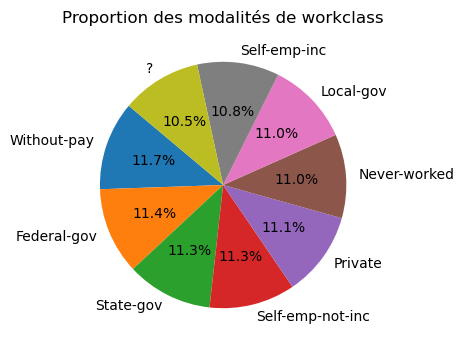

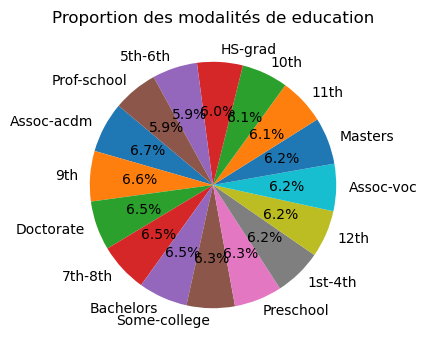

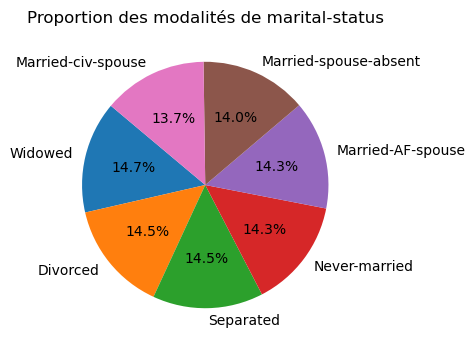

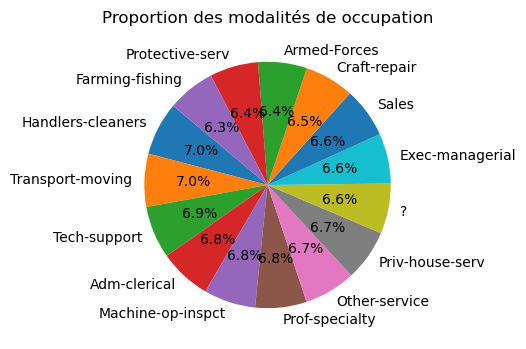

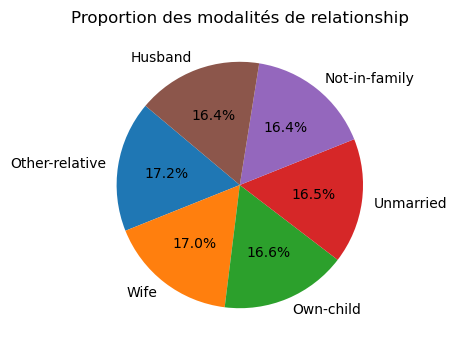

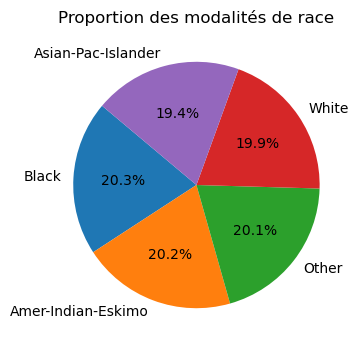

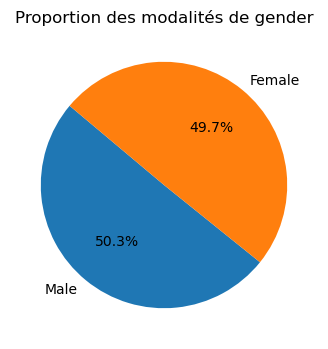

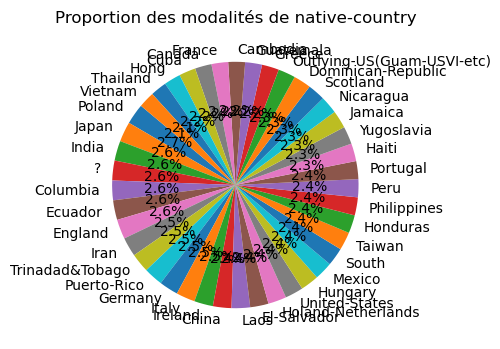

In [18]:
# Boucle qui itere le processus de création d'un piechart pour chaque variable qualitative
for col in variables_quali2:
    prop_mod = df_test[col].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    plt.show()

Graph Quanti

C:\Users\theol\AppData\Local\Temp\ipykernel_31068\4133191085.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[variable], shade=True)  # shade=True pour colorier sous la courbe


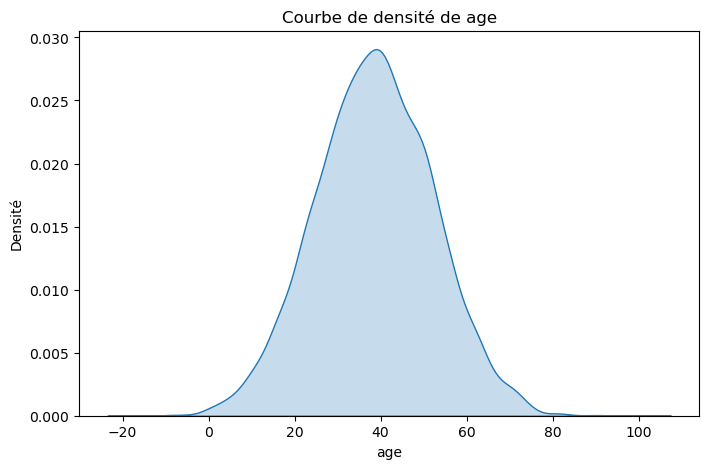

C:\Users\theol\AppData\Local\Temp\ipykernel_31068\4133191085.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[variable], shade=True)  # shade=True pour colorier sous la courbe


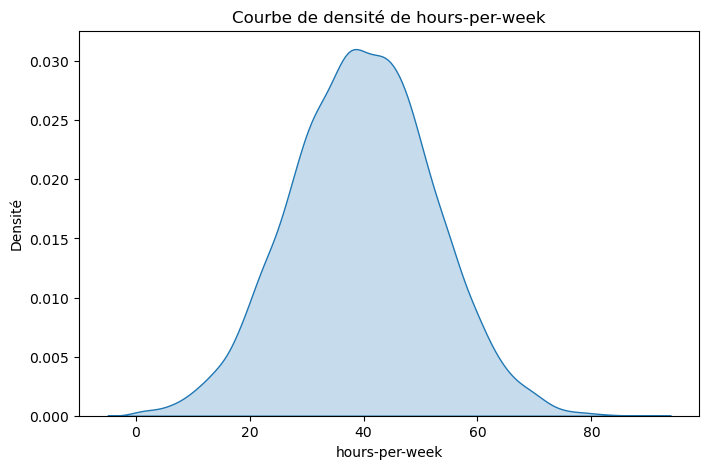

In [19]:
for variable in variable_courbe_dens:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df_test[variable], shade=True)  # shade=True pour colorier sous la courbe
    plt.title(f'Courbe de densité de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densité')
    plt.show()

Boxplots Valeurs Aberrantes

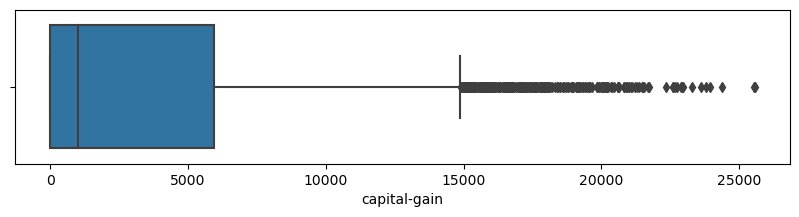

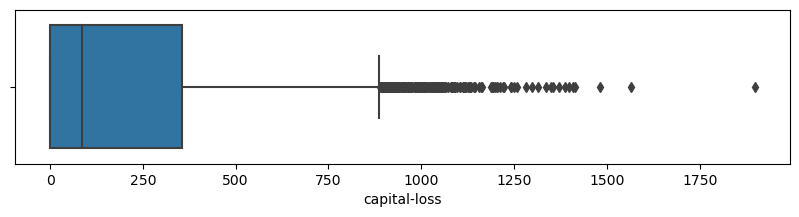

In [20]:
for variable in variables_quanti:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df_test[variable])
    plt.xlabel(variable)
    plt.show()

# TEST ?

In [21]:
df_point = df.copy()
df_point['contains_question_mark'] = df_point.apply(lambda row: 1 if '?' in row.values else 0, axis=1)
df_point

,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income,age_opti,hours-per-week_opti,contains_question_mark
0,Private,Low-education,Never-married,Occupation:Low-income,Own-child,Black,Male,0,0,United-States,<=50K,"(24.0, 28.0]","(39.0, 43.0]",0
1,Private,HS-grad,Married-civ-spouse,Occupation:Low-income,Husband,White,Male,0,0,United-States,<=50K,"(35.0, 41.0]","(43.0, 54.0]",0
2,State-Local-gov,Assoc,Married-civ-spouse,Occupation:High-income,Husband,White,Male,0,0,United-States,>50K,"(24.0, 28.0]","(39.0, 43.0]",0
3,Private,Some-college,Married-civ-spouse,Occupation:Low-income,Husband,Black,Male,7688,0,United-States,>50K,"(41.0, 55.0]","(39.0, 43.0]",0
4,No_income_or_unknown,Some-college,Never-married,Occupation:Very-Low-income,Own-child,White,Female,0,0,United-States,<=50K,"(28.0, 35.0]","(28.0, 39.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc,Married-civ-spouse,Occupation:High-income,Wife,White,Female,0,0,United-States,<=50K,NaN,NaN,0
48838,Private,HS-grad,Married-civ-spouse,Occupation:Low-income,Husband,White,Male,0,0,United-States,>50K,NaN,NaN,0
48839,Private,HS-grad,Alone,Occupation:Low-income,Unmarried,White,Female,0,0,United-States,<=50K,NaN,NaN,0
48840,Private,HS-grad,Never-married,Occupation:Low-income,Own-child,White,Male,0,0,United-States,<=50K,NaN,NaN,0


In [22]:
# Calcule les pourcentages pour chaque combination workclass et income
variables_quali2 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']

for variable in variables_quali2 :
    grouped = df_point.groupby([variable, 'contains_question_mark']).size().unstack()
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100
    print(percentages)

    # Tri de l'affichage des modalités en fonction du pourcentage de la classe '<=50K'
    percentages['sort'] = percentages['<=50K']
    percentages = percentages.sort_values(by='sort', ascending=False).drop(columns='sort')

    # Diagramme en barres avec pourcentages
    ax = percentages.plot(kind='barh', stacked=True, color=['#ec5757', '#4fe29d'])
    plt.title('Répartition des revenus (%) en fonction du type de '+ variable )
    plt.ylabel(variable)
    plt.xlabel('Pourcentage (%)')
    plt.legend(title='Income', loc='upper left')
    plt.show()

contains_question_mark      0
workclass                    
Federal-gov             100.0
No_income_or_unknown    100.0
Private                 100.0
Self-emp-inc            100.0
Self-emp-not-inc        100.0
State-Local-gov         100.0


KeyError: '<=50K'